In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import scipy
from prova import best_fit, gaus, gaus3, clean_data, apri

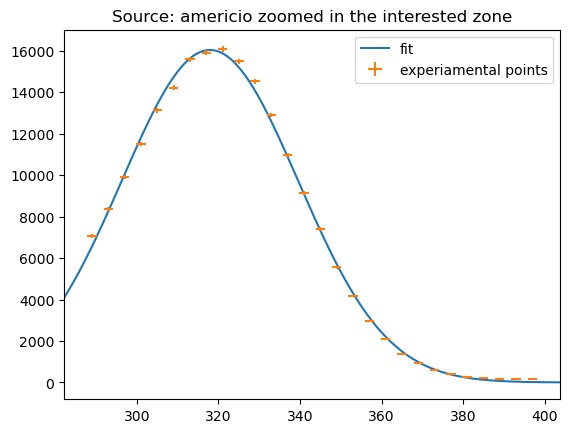

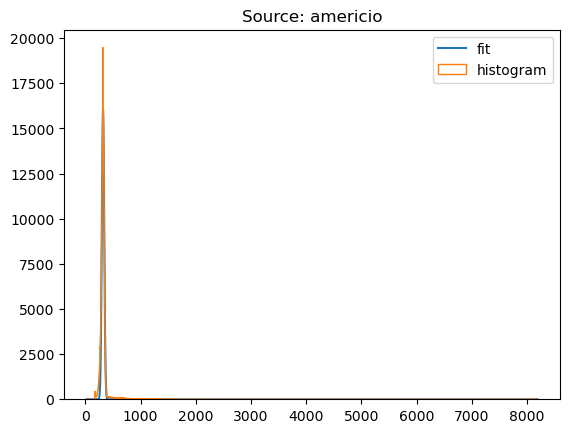

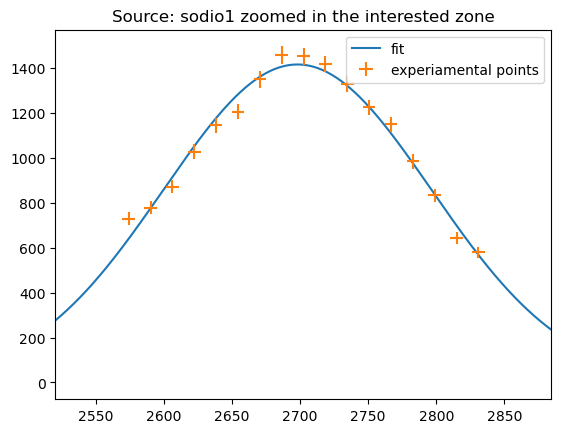

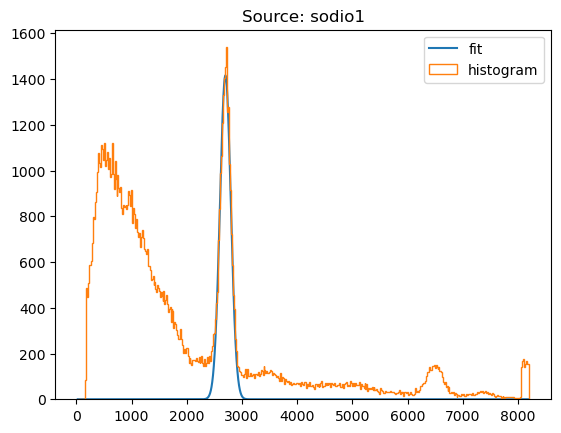

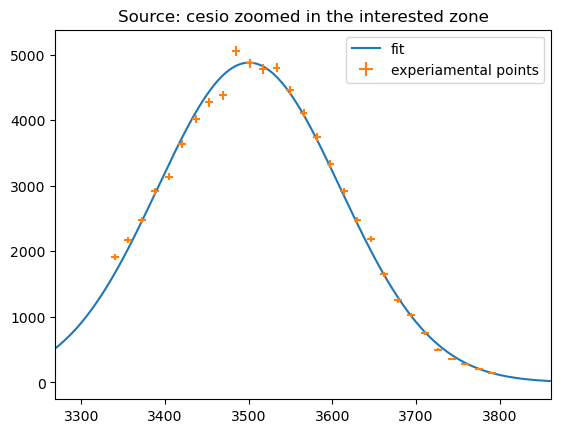

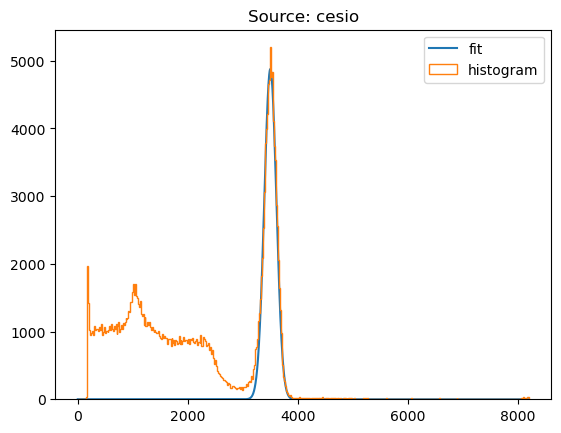

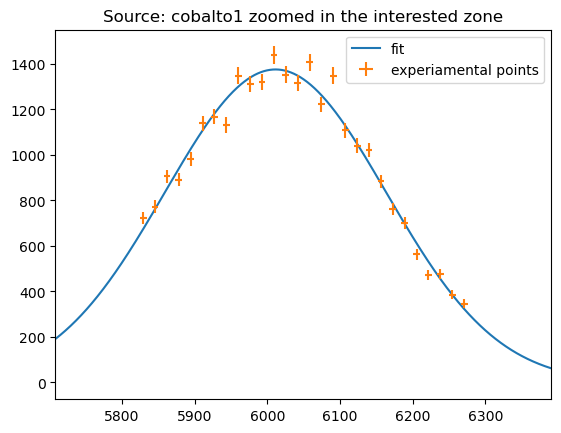

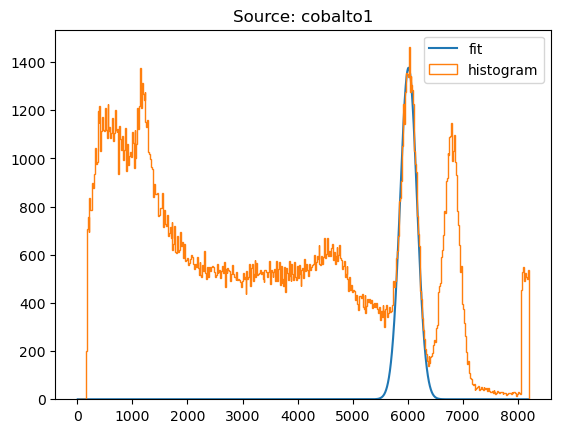

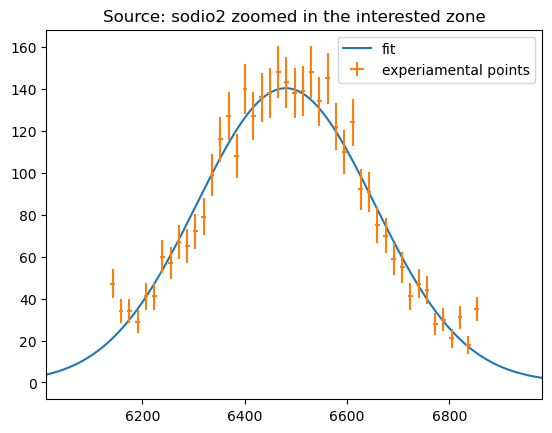

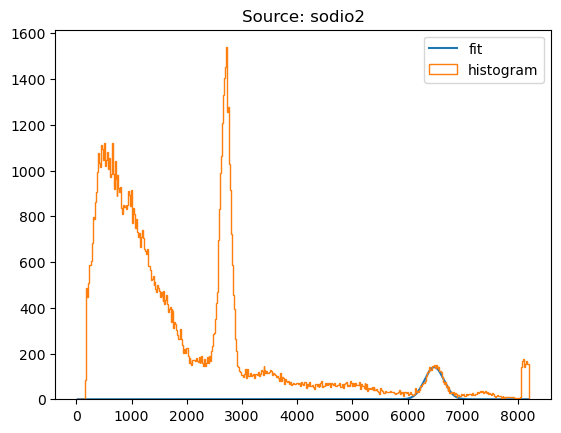

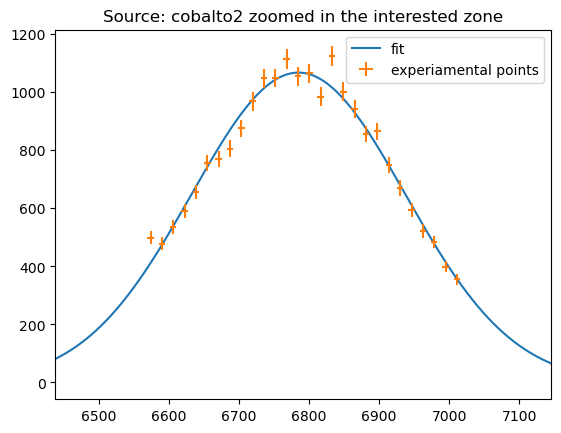

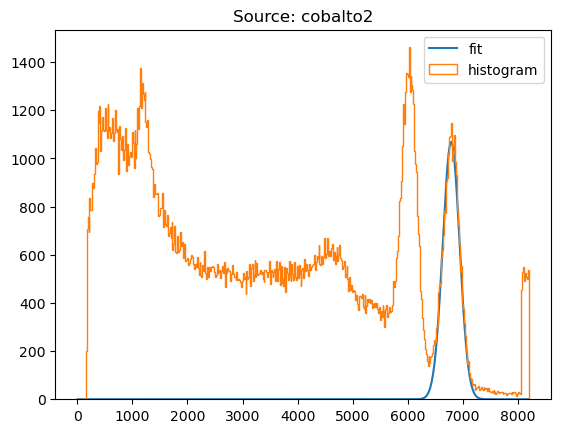

In [6]:
sorgenti = ["americio", "sodio1", "cesio", "cobalto1", "sodio2", "cobalto2"]
file = [r"Data\290323\290323_americio2.dat",
        r"Data\290323\290323_sodio2.dat",
        r"Data\290323\290323_cesio2.dat",
        r"Data\290323\290323_cobalto2.dat",
        r"Data\290323\290323_sodio2.dat",
        r"Data\290323\290323_cobalto2.dat"]
inf = np.array([286, 2565, 3331, 5820, 6133, 6565])
sup = np.array([400, 2840, 3800, 6280, 6862, 7020])
theta = np.radians(22)

media = []
err_media = []

larghezza = []
err_larghezza = []

for i in range(len(inf)):
     popt, pcov, minimo, massimo =best_fit(file[i], inf[i], sup[i], sorgenti[i])

     x=np.linspace(minimo, massimo, 100000)
     y_output = gaus(x, C=popt[0],mean=popt[1],sigma=popt[2])
    
     plt.plot(x,y_output, label='fit')

     y,E,dy,dE,_, binsfit=clean_data(file[i], inf[i], sup[i], sorgenti[i])
     plt.errorbar(E,y,dy,dE,' ', label='experiamental points')

     left=min(E)
     right=max(E)

     left=left-(right+left)/100
     right=right+(right+left)/100
     plt.xlim(left=left,right=right)


     plt.title(f"Source: {sorgenti[i]} zoomed in the interested zone")
     plt.legend()
     plt.show()

     plt.plot(x,y_output, label='fit')


     plt.hist(apri(file[i]),bins= 2000 if sorgenti[i]== "americio" else 500, histtype='step',label='histogram')

     plt.title(f"Source: {sorgenti[i]}")
     plt.legend()
     plt.show()

     media.append([popt[1]])
     err_media.append(np.sqrt(pcov[1][1]))

     larghezza.append([popt[2]])
     err_larghezza.append(np.sqrt(pcov[2][2]))
  

media=np.array(media)
err_media=np.array(err_media)

larghezza=np.array(larghezza)
err_larghezza=np.array(err_larghezza)



In [7]:
for i in range(len(media)):
    print(f'Media {sorgenti[i]}:', media[i],'+-', err_media[i])

for i in range(len(larghezza)):
    print(f'Larghezza {sorgenti[i]}:', larghezza[i],'+-', err_larghezza[i])





Media americio: [317.91093281] +- 0.27465121258571856
Media sodio1: [2697.9768894] +- 1.5357832056037133
Media cesio: [3500.3038535] +- 1.1889707286029856
Media cobalto1: [6011.28045745] +- 2.3745247791768938
Media sodio2: [6480.0051168] +- 3.9456908557340262
Media cobalto2: [6784.96483832] +- 2.0179837242835323
Larghezza americio: [21.63698931] +- 0.21735010518064182
Larghezza sodio1: [98.4014146] +- 2.125028060051069
Larghezza cesio: [109.38742413] +- 1.0025229514812815
Larghezza cobalto1: [152.46553515] +- 2.765600705948039
Larghezza sodio2: [173.84258215] +- 3.8482840670131133
Larghezza cobalto2: [152.66157825] +- 2.6047077112018786


Parametri di best fit
 a = 5149.214526332551 +- 1.0219867793426352
 b = 12.223670254467322 +- 0.29663892520712387


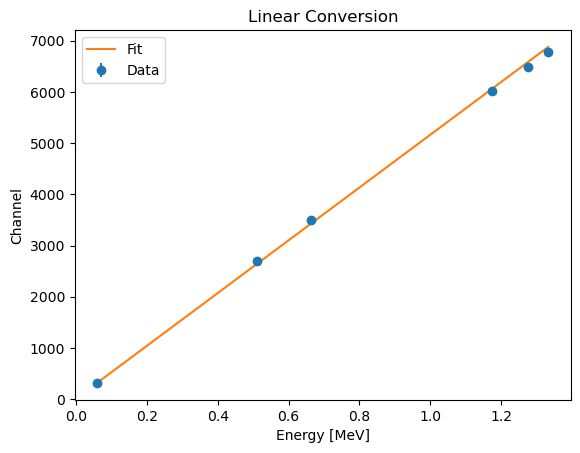

In [8]:
#FIT IMPLEMENTATO TRAMITE curve_fit
def linear_func(x, m, b):
    return m * x + b
    
energy = np.array([0.060, 0.511, 0.662, 1.173, 1.275, 1.333])
channel=np.array(media)



popt,pcov= curve_fit(linear_func,energy,channel.ravel(),sigma=err_media, absolute_sigma=True)
# Print the best fitting parameters
print('Parametri di best fit')
print(f" a = {popt[0]} +- {np.sqrt(pcov[0][0])}")
print(f" b = {popt[1]} +- {np.sqrt(pcov[1][1])}")


plt.errorbar(energy, channel.ravel(), yerr=err_media, fmt='o', label='Data')
plt.plot(energy, linear_func(energy, *popt), label='Fit')
plt.xlabel('Energy [MeV]')
plt.ylabel('Channel')
plt.title('Linear Conversion')
plt.legend()
plt.show()

Il parametro a vale:  [5149.21453271]  +-  [1.02198668]
Il parametro b vale:  [12.22366967]  +-  [0.29663892]
Chisquare = 5.9
Chisquare norm = 2.0


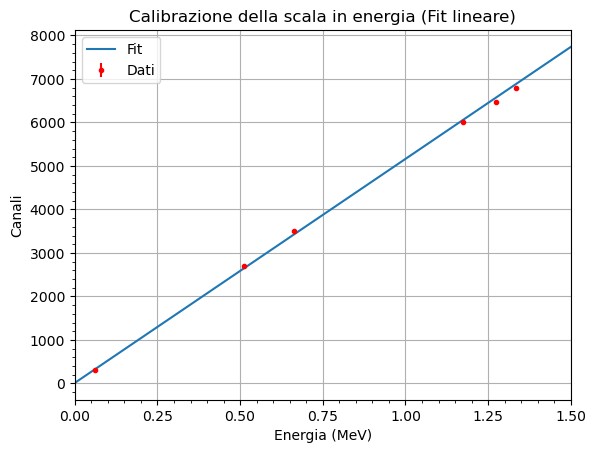

In [9]:
energie = np.array([0.060, 0.511, 0.662, 1.173, 1.275, 1.333])
channel=np.array(media)


weights=1/err_media


x, cov = np.polyfit(energie, channel, deg = 1, w = weights, full = False, cov = 'unscaled')


conversione = x[0]
offset = x[1]
err_conversione = np.sqrt(cov[0][0])
err_offset = np.sqrt(cov[1][1])

correlazione_conv_off = cov[0][1]

print("Il parametro a vale: ", conversione, " +- ", err_conversione)
print("Il parametro b vale: ", offset, " +- ", err_offset)



xp = np.linspace(0, 1.5, 1000)
yp = xp*conversione + offset
    

chisq = ((((channel.ravel() - (conversione*energie + offset))**2 / (conversione*energie + offset)))).sum()
print(f'Chisquare = {chisq:.1f}')
chisq_norm=chisq/(len(channel.ravel())-3)
print(f'Chisquare norm = {chisq_norm:.1f}')
        
plt.title('Calibrazione della scala in energia (Fit lineare)')
plt.xlabel('Energia (MeV)')
plt.ylabel('Canali')
plt.minorticks_on()
plt.xticks(ticks=np.arange(0, 1.5001, step = 0.25))
plt.xlim(left=0)
plt.xlim(right=1.5)
plt.tick_params(axis='both', which='minor')
plt.grid(visible=True, which='major')
plt.rc('axes', labelsize=10)



plt.errorbar(energie, channel.ravel(), yerr=err_media, marker = '.', linestyle = '', c='r')

plt.plot(xp, yp)

plt.gca().legend(['Fit', 'Dati'])

plt.show()
    



Il parametro A vale:  [-290.13885327]  +-  [3.13658452]
Il parametro B vale:  [5479.20997651]  +-  [3.71095997]
Il parametro C vale:  [-9.86631051]  +-  [0.3808192]
Chisquare = 0.2
Chisquare norm = 0.1


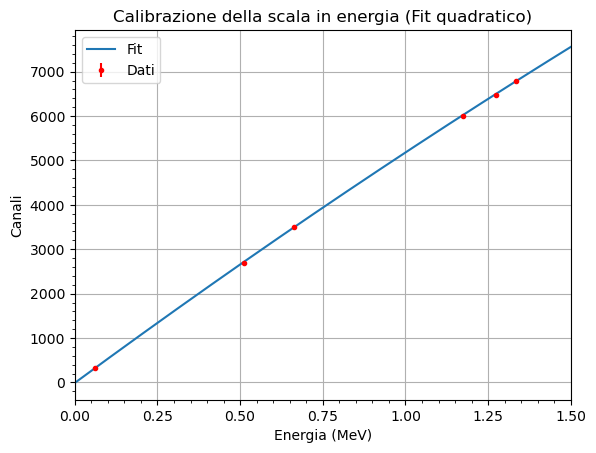

In [10]:
energie = np.array([0.060, 0.511, 0.662, 1.173, 1.275, 1.333])
channel=np.array(media)


weights=1/err_media


x, cov = np.polyfit(energie, channel, deg = 2, w = weights, full = False, cov = 'unscaled')


A = x[0]
B = x[1]
C = x[2]
err_A = np.sqrt(cov[0][0])
err_B = np.sqrt(cov[1][1])
err_C = np.sqrt(cov[2][2])


correlazione_A_B = cov[0][1]
correlazione_A_C = cov[0][2]
correlazione_B_C = cov[1][2]



print("Il parametro A vale: ", A, " +- ", err_A)
print("Il parametro B vale: ", B, " +- ", err_B)
print("Il parametro C vale: ", C, " +- ", err_C)


xp = np.linspace(0, 1.5, 1000)
yp = xp*xp*A + xp*B + C
    
chisq = ((((channel.ravel() - (A*energie*energie + B*energie + C))**2 / (A*energie*energie + B*energie + C)))).sum()
print(f'Chisquare = {chisq:.1f}')
chisq_norm=chisq/(len(channel.ravel())-4)
print(f'Chisquare norm = {chisq_norm:.1f}')

        
plt.title('Calibrazione della scala in energia (Fit quadratico)')
plt.xlabel('Energia (MeV)')
plt.ylabel('Canali')
plt.minorticks_on()
plt.xticks(ticks=np.arange(0, 1.5001, step = 0.25))
plt.xlim(left=0)
plt.xlim(right=1.5)
plt.tick_params(axis='both', which='minor')
plt.grid(visible=True, which='major')
plt.rc('axes', labelsize=10)



plt.errorbar(energie, channel.ravel(), yerr=err_media, marker = '.', linestyle = '', c='r')

plt.plot(xp, yp)

plt.gca().legend(['Fit', 'Dati'])

plt.show()
    



_______________________________
_______________________________
_______________________________
Chisquare = 52.5
Chisquare norm = 1.3


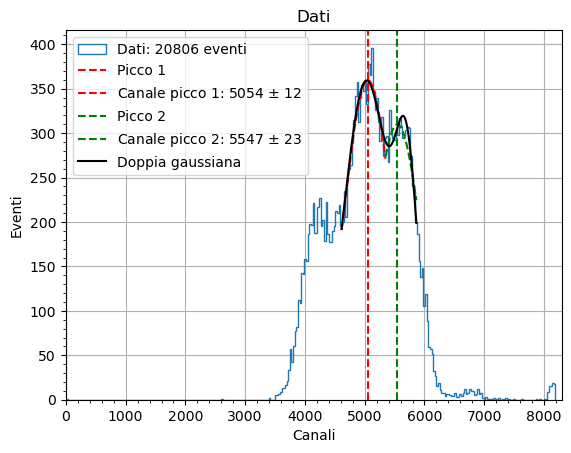

In [26]:
e=apri(r"Data\290323\290323_test6(20gradi).dat")

ex=np.array(e)

binstot = 300

fitinf = 4612
fitmed = 5349
fitsup = 5866

ex=ex[ex>fitinf]
ex=ex[ex<fitmed]

ex2=np.array(e)

ex2=ex2[ex2>fitmed]
ex2=ex2[ex2<fitsup]

ex3=np.array(e)

ex3=ex3[ex3>fitinf]
ex3=ex3[ex3<fitsup]



plt.hist(e,bins=binstot, histtype='step', label=f'Dati: {len(e)} eventi')
plt.legend()



        


#PRIMO PICCO
a=np.histogram(ex, bins=round(binstot*(max(ex)-min(ex))/(max(e)-min(e))))
tops=a[0] #y data
d_tops=np.sqrt(a[0])
bin_edges=a[1]
bin_centers=list() #x data
for i in range(len(tops)):
    bin_center=(bin_edges[i]+bin_edges[i+1])/2
    bin_centers.append(bin_center)
       
        
d_bin=[]
for i in range(len(tops)):
    d=bin_edges[i+1]-bin_edges[i]
    d_bin.append(d)


mean=np.mean(ex)
varianza=np.var(ex)
sigma=np.sqrt(varianza)
ampiezza=np.max(ex)

        
y=[] #ARRAY WITHOUTH ZEROES ELEMENTS
E=[] #ARRAY WITHOUTH ZEROES ELEMENTS
dE=[]
dy=[]
for i in range(0,len(tops)):
    if(tops[i]!=0):
        y.append(tops[i])
        E.append(bin_centers[i])
        dE.append((1/np.sqrt(12))*d_bin[i])
        dy.append(d_tops[i])
            
y=np.array(y)
E=np.array(E)
dy=np.array(dy)
dE=np.array(dE)
    

#FIT
initParams=np.array([ampiezza,mean,sigma])
fitting_params,cov_matrix = scipy.optimize.curve_fit(gaus,E,y,initParams,dy, absolute_sigma=False)


# ITERATIVELY UPDATE THE ERRORS AND REFIT.

for i in range(10):  
    dTT=np.sqrt(dy**2+( ((E-mean)/(sigma**2))*ampiezza*np.exp(-((E-mean)**2)/2*(sigma**2))*dE   )**2)
    fitting_params, cov_matrix=scipy.optimize.curve_fit(gaus, E, y,initParams , dTT, absolute_sigma=False)



p_sigma = np.sqrt(np.diag(cov_matrix))
err=np.array(p_sigma)

print('_______________________________')
x=np.linspace(min(ex), max(ex), 1000)


y_output = gaus(x, C=fitting_params[0],mean=fitting_params[1],sigma=fitting_params[2])
plt.plot(x,y_output,color='r', ls= '--', label='Picco 1')

plt.axvline(x=fitting_params[1], color='r', linestyle='--', label=f'Canale picco 1: {round(fitting_params[1])} $\pm$ ' f'{round(err[1])}')

plt.legend()
   




#SECONDO PICCO
a2=np.histogram(ex2, bins=round(binstot*(max(ex2)-min(ex2))/(max(e)-min(e))))
tops2=a2[0] #y data
d_tops2=np.sqrt(a2[0])
bin_edges2=a2[1]
bin_centers2=list() #x data
for i in range(len(tops2)):
    bin_center2=(bin_edges2[i]+bin_edges2[i+1])/2
    bin_centers2.append(bin_center2)
      
      
d_bin2=[]
for i in range(len(tops2)):
    d2=bin_edges2[i+1]-bin_edges2[i]
    d_bin2.append(d2)



mean2=np.mean(ex2)
varianza2=np.var(ex2)
sigma2=np.sqrt(varianza2)
ampiezza2=np.max(ex2)


        
y2=[] #ARRAY WITHOUTH ZEROES ELEMENTS
E2=[] #ARRAY WITHOUTH ZEROES ELEMENTS
dE2=[]
dy2=[]
for i in range(0,len(tops2)):
    if(tops2[i]!=0):
        y2.append(tops2[i])
        E2.append(bin_centers2[i])
        dE2.append((1/np.sqrt(12))*d_bin2[i])
        dy2.append(d_tops2[i])
            
y2=np.array(y2)
E2=np.array(E2)
dy2=np.array(dy2)
dE2=np.array(dE2)


#FIT
initParams2=np.array([ampiezza2,mean2,sigma2])
fitting_params2,cov_matrix2 = scipy.optimize.curve_fit(gaus2,E2,y2,initParams2,dy2, absolute_sigma=False)


# ITERATIVELY UPDATE THE ERRORS AND REFIT.

for i in range(10):  
    dTT2=np.sqrt(dy2**2+( ((E2-mean2)/(sigma2**2))*ampiezza2*np.exp(-((E2-mean2)**2)/2*(sigma2**2))*dE2   )**2) 
    fitting_params2, cov_matrix2=scipy.optimize.curve_fit(gaus2, E2, y2,initParams2 , dTT2, absolute_sigma=False)



p_sigma2 = np.sqrt(np.diag(cov_matrix2))
err2=np.array(p_sigma2)

print('_______________________________')
z2=np.linspace(min(ex2), max(ex2), 1000)

y_output2 = gaus2(z2, C2=fitting_params2[0],mean2=fitting_params2[1],sigma2=fitting_params2[2])

plt.plot(z2,y_output2,color='g', ls= '--', label='Picco 2')
plt.axvline(x=fitting_params2[1], color='g', linestyle='--', label=f'Canale picco 2: {round(fitting_params2[1])} $\pm$ ' f'{round(err2[1])}')


plt.legend()









#DOPPIA GAUSSIANA
a3=np.histogram(ex3, bins=round(binstot*(max(ex3)-min(ex3))/(max(e)-min(e))))
tops3=a3[0] #y data
d_tops3=np.sqrt(a3[0])
bin_edges3=a3[1]
bin_centers3=list() #x data
for i in range(len(tops3)):
    bin_center3=(bin_edges3[i]+bin_edges3[i+1])/2
    bin_centers3.append(bin_center3)
        
        
d_bin3=[]
for i in range(len(tops3)):
    d3=bin_edges3[i+1]-bin_edges3[i]
    d_bin3.append(d3)




        
y3=[] #ARRAY WITHOUTH ZEROES ELEMENTS
E3=[] #ARRAY WITHOUTH ZEROES ELEMENTS
dE3=[]
dy3=[]
for i in range(0,len(tops3)):
    if(tops3[i]!=0):
        y3.append(tops3[i])
        E3.append(bin_centers3[i])
        dE3.append((1/np.sqrt(12))*d_bin3[i])
        dy3.append(d_tops3[i])
           
y3=np.array(y3)
E3=np.array(E3)
dy3=np.array(dy3)
dE3=np.array(dE3)


#FIT
initParams3=np.array([ampiezza,mean,sigma,ampiezza2,mean2,sigma2])
fitting_params3,cov_matrix3 = scipy.optimize.curve_fit(gaus3,E3,y3,initParams3,dy3, absolute_sigma=False)


# ITERATIVELY UPDATE THE ERRORS AND REFIT.

for i in range(50):  
    dTT3=np.sqrt(dy3**2+( ((E3-mean2)/(sigma2**2))*ampiezza2*np.exp(-((E3-mean2)**2)/(2*(sigma2**2)))*dE3   )**2 +( ((E3-mean)/(sigma**2))*ampiezza*np.exp(-((E3-mean)**2)/(2*(sigma**2)))*dE3   )**2) 
    fitting_params3, cov_matrix3=scipy.optimize.curve_fit(gaus3, E3, y3, initParams3, dTT3, absolute_sigma=False)



p_sigma3 = np.sqrt(np.diag(cov_matrix3))
err3=np.array(p_sigma3)

print('_______________________________')
z3=np.linspace(min(ex3), max(ex3), 1000)


y_output3 = gaus3(z3, C=fitting_params3[0],mean=fitting_params3[1],sigma=fitting_params3[2],C2=fitting_params3[3],mean2=fitting_params3[4],sigma2=fitting_params3[5])



        
chisq = ((((y3 - gaus3(E3, *fitting_params3)))**2 / gaus3(E3, *fitting_params3))).sum()
print(f'Chisquare = {chisq:.1f}')
chisq_norm=chisq/(len(y3)-7)
print(f'Chisquare norm = {chisq_norm:.1f}')





plt.plot(z3, y_output3, color='k', label='Doppia gaussiana')
plt.legend()

plt.title('Dati')
plt.xlabel('Canali')
plt.ylabel('Eventi')
plt.minorticks_on()
plt.xticks(ticks=np.arange(0, 8300, step = 1000))
plt.xlim(left=0)
plt.xlim(right=8300)
plt.tick_params(axis='both', which='minor')
plt.grid(visible=True, which='major')
plt.rc('axes', labelsize=10)
    
plt.show()

In [18]:
def zoom_in_plot(file,inf,sup):
    y,E,dy,dE,_,_ = clean_data(file,inf, sup,'asd')
    popt, pcov, minimo, massimo =best_fit(file, inf, sup, 'asd' )
    x=np.linspace(minimo, massimo, 100000)
    y = gaus(x, *popt)
        
    plt.plot(x,y, label='fit')

    plt.errorbar(E,y,dy,dE,' ', label='experiamental points')
    
    left=min(E)
    right=max(E)

    left=left-(right+left)/100
    right=right+(right+left)/100
    plt.xlim(left=left,right=right)


    plt.title("Graph zoomed in the interested zone")
    plt.legend()
    plt.show()

    return popt,pcov


ValueError: 'x' and 'y' must have the same size

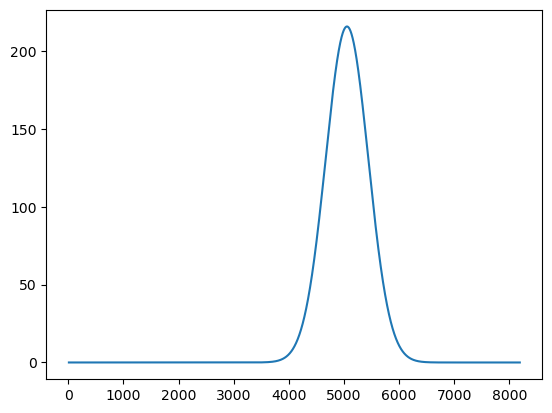

In [17]:
file = r"Data\290323\290323_test6(20gradi).dat"
inf1=4612
sup1=5349
popt1,pcov1=zoom_in_plot(file,inf1,sup1)

inf2=5349
sup2=5866
popt2,pcov2=zoom_in_plot(file,inf2,sup2)


x=np.linspace(3000,8000,500)
y=gaus(x,*popt1)
plt.plot(x,y, label='fit')


plt.hist(apri(file),bins= 2000 if sorgenti[i]== "americio" else 500, histtype='step',label='histogram')

plt.title("Spettro Energia")
plt.legend()
plt.show()


In [ ]:
massa1=0.351
err_massa1=0.025
massa2=0.326
err_massa2=0.022

massa_totale=(massa1+massa2)/2
sigma_stat=(err_massa1+err_massa2)/2
sigma_sist=(massa1-massa2)/2
sigma_m=np.sqrt(sigma_stat**2+sigma_sist**2)


print(f'massa={massa_totale}')
print(f'sigma_m={sigma_m}')
print(f'sigma_sist={sigma_sist}')
print(f'sigma_stat={sigma_stat}')

massa=0.3385
sigma_m=0.026617663308412323
sigma_sist=0.012499999999999983
sigma_stat=0.0235
